# 1. Descripción del problema (Problema de la mochila)

**Entrada**: Un valor W que representa la cantidad máxima de la mochila, dos arreglos, uno de valores de largo $n$ $val = [a_1,a_2,...,a_n]$ y otro arreglo con el peso de $n$ objetos $w = [w_1,w_2,...,w_n]$.

**Salida**: Un conjunto de objetos que maximizan el valor total.

El problema de la mochila (Inglés: Knapsack Problem) se refiere a un problema de optimización combinatoria, en otras palabras, debemos buscar la mejor solución de un conjunto de soluciones para llenar una mochila que tiene un límite de peso permitido, donde cada objeto tiene un peso y un valor asignados. Debemos optimizar el valor total y evitar exceder el límite de peso.

# 2. Problema de la mochila

El siguiente código contiene implementaciones del algoritmo de **knapsackProblem** de manera dinámica y greedy

## 2.1. Código

In [14]:
import random as rd
from termcolor import colored
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import copy
import datetime
from timeit import repeat
import statistics as st
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [15]:
def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = rd.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = rd.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

In [16]:
subproblemas = 0

def knapSackDin(W, wt, val, n, verbose = False):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
    if verbose:
        print(f"Se crea una matriz {n+1} x {W+1} inicializada con 0s.")
        print("------------------------------------------------------")
 
    for i in range(n + 1):
        for w in range(W + 1):
            global subproblemas
            subproblemas += 1
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
                if verbose:
                    print(f"Pesos en la posición {i-1} ≤ {w}, entonces: ")
                    print(f"La mayor ganancia guardada será el mayor valor entre {val[i-1] + K[i-1][w-wt[i-1]]}")
                    print(f"La mayor ganancia encontrada entre los valores descritos previamente fue guardada: {K[i][w]}")
            else:
                K[i][w] = K[i-1][w]
                if verbose:
                    print(f"Pesos en la posición {i-1} > {w}")
                    print(f"Nuestra mayor ganancia guardada será: {K[i][w]}")
    if verbose: print("------------------------------------------------------")

    return K[n][W]

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print("Valor máximo que podemos tener en la mochila: ", knapSackDin(W, wt, val, n))
print("Subproblemas resueltos: ", subproblemas)


Valor máximo que podemos tener en la mochila:  220
Subproblemas resueltos:  204


In [17]:
iteraciones = 0

def knapSackGre(W, wt, val, n, verbose = False):
  K = [0 for x in range(n)]
  l = [x for x in range(n)]
  
  for i in range(0, n):
    K[i] = val[i]/wt[i]
  if verbose:
    print(f"Arreglo de razones valor/peso de los objetos: {K}")
    print(f"Arreglo de indices de cada objeto: {l}")
    print("Ahora ordenaremos los objetos según sus razones de forma descendente.")
    print("------------------------------------------------------")

  for i in range (n):
    mayor = 0
    if verbose: print(f"Mayor razón: {mayor}")
    for j in range(i, n):
      if verbose: print(f"Razón objeto actual: {K[j]}")
      if K[j] > mayor:
        if verbose: print(f"{K[j]} es mayor que la mayor razón previamente encontrada, {mayor}")
        mayor = K[j]
        if verbose: print(f"Nueva mayor razón: {mayor}")
        K[j], K[i] = K[i], K[j]
        l[j], l[i] = l[i], l[j]
    if verbose: print("------------------------------------------------------")

  if verbose:
    print(f"Arreglo de razones valor/peso ordenado de los objetos: {K}")
    print(f"Arreglo de indices ordenado de cada objeto: {l}")
    print("Ahora almacenaremos los objetos en la mochila.")
    print("------------------------------------------------------")

  maximo = 0
  if verbose: print("Máximo valor almacenado en la mochila:", maximo)

  for i in l:
    global iteraciones
    iteraciones += 1
    if wt[i] <= W:
      maximo += val[i]
      if verbose: print("Máximo valor almacenado en la mochila:", maximo)
      W -= wt[i]

  return maximo

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print("Valor máximo que podemos tener en la mochila: ", knapSackGre(W, wt, val, n))
print("Cantidad de iteraciones:", iteraciones)

Valor máximo que podemos tener en la mochila:  160
Cantidad de iteraciones: 3


## 2.2. Descripción del algoritmo

### 2.2.1 Algoritmo Dinámico

La solución mediante programación dinámica consiste en reducir el tiempo de ejecución general utilizando soluciones óptimas para subproblemas. Con esta implemenctación, buscamos obtener una solución más global para el problema.

Lo que ejecuta el algoritmo consiste en lo siguiente:

1. Creamos una matriz $m$, inicializada con todos los valores en $0$.

2. Recorremos las filas con un ciclo, y las columnas con otro.

3. Aplicamos la subestructura óptima para encontrar un valor máximo para cada subproblema posible considerando los elementos que puedan sobrepasar el límite de peso de la mochila.

### 2.2.2 Algoritmo Greedy

Esta solución implementa la estrategia greedy, esta es una estrategia de búsqueda que elige una opción óptima para cada paso local y "jugándosela" esperando a que esta solución sea óptima globalmente. Esta es una manera ineficiente de resolver el problema ya que nos estamos enfocando solamente en la mejor solución para el subproblema actual, no en una solución global. Entonces tenemos una probabilidad aleatoria de encontrar la solución óptima global, o también de nunca encontrarla.

La solución greedy de este problema sigue los siguientes pasos:

1. Creamos un arreglo $a$ que almacena los índices de los objetos

2. Calculamos el valor por kg de cada objeto y lo guardamos  en un nuevo arreglo $b$, el cual ordenamos de menor a mayor.

3. Recorremos los índices de cada objeto en $b$ y lo agregamos a la mochila.

## 2.3 Ejemplos

### 2.3.1 Implementación dinámica

Comenzamos ingresando con un arreglo de valores, pesos y la cantidad de peso máximo soportado por la mochila.

$val = [8, 12, 15]$

$wt = [1, 2, 3]$

$W = 5$

1. Creamos una matriz de 0s de tamaño 4x6:

$M = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}$

2. Recorremos las filas desde 0 a 4, y las columnas de 0 a 6.

3. En la posición $(0,0)$ de la matriz, dejamos el valor en 0 ya que esta posición posee por lo menos una fila o columna con índice 0. Esto se repite para toda la primera iteración, debido a que siempre en este caso la fila sera igual a 0. Entonces tambien ocurrirá en las posiciones $(1,0)$, $(2,0)$ y $(3,0)$.

4. Accedemos a la posición $(1,1)$ de la matriz. Si $wt[0] \leq 1$, el valor almacenado en la posición actual corresponderá al mayor valor entre $val[0] + M[0][0]$ y $M[0][1]$. En nuestro caso, $1 \leq 1$, entonces el valor almacenado será el mayor entre $8 + 0$ y $0$. El valor almacenado en la posición $(1,1)$ termina siendo igual a 8.

$M = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 8 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0
\end{bmatrix}$

5. Repetimos el proceso hasta calcular cada valor de cada posición de la matriz.

Al finalizar, retornamos la última posición de la matriz, la cual tiene la solución del problema.

### 2.3.2 Implementación Greedy

Comenzamos ingresando con un arreglo de valores, pesos y la cantidad de peso máximo soportado por la mochila.

$val = [8, 12, 15]$

$wt = [1, 2, 3]$

$W = 5$

1. Creamos dos arreglos, ambos de largo igual a la cantidad de objetos ingresados, y los inicializamos con las razones valor/peso de los objetos y sus índices:

$K = [8, 6, 5]$

$l = [0, 1, 2]$

2. Debemos ordenar los objetos de mayor a menor con respecto a sus razones valor/peso y actualizar sus posiciones al reordenar. Pero en nuestro caso, ya se encontraban ordenados de esta manera, entonces no es necesario este paso.

3. Comenzamos a ingresar los objetos a la mochila en el orden indicado en el arreglo de índices.

4. Revisamos si el peso en el índice $0$ es menor o igual al peso de la mochila, si es así, sumamos el valor de este objeto al valor almacenado. Y restamos el peso del objeto al peso libre de la mochila. Esto nos deja con un valor almacenado de $8$ y un peso libre de $4$.

5. Hacemos la misma revisión, pero esta vez con el índice $1$ y con nuestros nuevos valores de peso libre y valor almacenado. Terminamos con un valor almacenado de $20$ y un peso libre de $2$.

6. Repetimos la revisión una última vez en el índice $2$ esta vez, pero como el peso del objeto sobrepasa el peso libre de la mochila, no lo agregamos a esta.

Terminamos retornando el valor de los objetos almacenados en la mochila, que en este caso es igual a 20.


## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

### 2.4.1 knapSackDin (Algoritmo Dinámico)

In [18]:
W, val, wt = knapsack_instance_generator(5)
print("Valores:", val)
print("Pesos:", wt)
print("Peso máximo de la mochila:", W)
print("------------------------------------------------------")
cantObj = len(val)
valMax = knapSackDin(W, wt, val, cantObj, verbose = True)
print("------------------------------------------------------")
print(f"Valor máximo que podemos tener en la mochila: {valMax}")
print("Subproblemas resueltos:", subproblemas)

Valores: [27, 48, 124, 138, 157]
Pesos: [3, 5, 9, 10, 13]
Peso máximo de la mochila: 20
------------------------------------------------------
Se crea una matriz 6 x 21 inicializada con 0s.
------------------------------------------------------
Pesos en la posición 0 > 1
Nuestra mayor ganancia guardada será: 0
Pesos en la posición 0 > 2
Nuestra mayor ganancia guardada será: 0
Pesos en la posición 0 ≤ 3, entonces: 
La mayor ganancia guardada será el mayor valor entre 27
La mayor ganancia encontrada entre los valores descritos previamente fue guardada: 27
Pesos en la posición 0 ≤ 4, entonces: 
La mayor ganancia guardada será el mayor valor entre 27
La mayor ganancia encontrada entre los valores descritos previamente fue guardada: 27
Pesos en la posición 0 ≤ 5, entonces: 
La mayor ganancia guardada será el mayor valor entre 27
La mayor ganancia encontrada entre los valores descritos previamente fue guardada: 27
Pesos en la posición 0 ≤ 6, entonces: 
La mayor ganancia guardada será el mayo


### 2.4.2 knapSackGre (Algoritmo Greedy)

In [19]:
W, val, wt = knapsack_instance_generator(5)
print("Valores:", val)
print("Pesos:", wt)
print("Peso máximo de la mochila:", W)
print("------------------------------------------------------")
cantObj = len(val)
valMax = knapSackGre(W, wt, val, cantObj, verbose = True)
print("------------------------------------------------------")
print(f"Valor máximo que podemos tener en la mochila: {valMax}")
print("Cantidad de iteraciones:", iteraciones)

Valores: [37, 60, 77, 134, 142]
Pesos: [6, 7, 5, 9, 12]
Peso máximo de la mochila: 19
------------------------------------------------------
Arreglo de razones valor/peso de los objetos: [6.166666666666667, 8.571428571428571, 15.4, 14.88888888888889, 11.833333333333334]
Arreglo de indices de cada objeto: [0, 1, 2, 3, 4]
Ahora ordenaremos los objetos según sus razones de forma descendente.
------------------------------------------------------
Mayor razón: 0
Razón objeto actual: 6.166666666666667
6.166666666666667 es mayor que la mayor razón previamente encontrada, 0
Nueva mayor razón: 6.166666666666667
Razón objeto actual: 8.571428571428571
8.571428571428571 es mayor que la mayor razón previamente encontrada, 6.166666666666667
Nueva mayor razón: 8.571428571428571
Razón objeto actual: 15.4
15.4 es mayor que la mayor razón previamente encontrada, 8.571428571428571
Nueva mayor razón: 15.4
Razón objeto actual: 14.88888888888889
Razón objeto actual: 11.833333333333334
----------------------

# 3. Tiempo de ejecución

## 3.1 knapSackDin (Implementación Dinámica)

### Teorema: tiempo de ejecución

El algoritmo *knapSackDin* tiene un tiempo de ejecución de $O(n * w)$.

### Prueba del teorema

El algoritmo consta principalmente de dos ciclos iterativos anidados, el primero, que itera $n$ veces y el segundo, el cuál itera $w$ veces, lo cual significa que la complejidad temporal de estos dos ciclos es de $O(n * w)$. Donde $n$ es la cantidad de objetos de entrada y $w$ es el peso máximo de la mochila. 

Al terminar el proceso iterativo, el único paso restante sería retornar la solución óptima, el cuál tiene una complejidad de $O(1)$, ya que sólo debe acceder a la última posición de la matriz para recibir el valor a retornar.

Gracias a lo anterior, podemos concluir que el tiempo de ejecución de la implementación dinámica de este algoritmo es de $O(n * w) + O(1)$, lo que podemos simplificar a $O(n * w)$.

## 3.2 knapSackGre (Implementación Greedy)

### Teorema: tiempo de ejecución

El algoritmo *knapSackGre* tiene un tiempo de ejecución de $O(n^2)$.

### Prueba del teorema

Podemos comenzar calculando el tiempo de ejecución de la primera parte del algoritmo. Esta parte consta de dos ciclos iterativos anidados, el primero, que itera $n$ veces y el segundo, el cuál también itera $n$ veces en un principio, pero itera desde el índice en el que se encuentre el índice del primer ciclo hasta $n$. Debido a lo anterior, este proceso tiene un tiempo de ejecución igual a $O(n^2)$. Donde $n$ es la cantidad de objetos de entrada.

Luego se debe iterar $n$ veces en otro ciclo iterativo para ingresar objetos en la mochila y así encontrar la solución del problema. Este proceso tiene una complejidad de $O(n)$.

Gracias a lo anterior, podemos concluir que el tiempo de ejecución de la implementación greedy de este algoritmo es de $O(n^2) + O(n)$, lo que podemos simplificar a $O(n^2)$.

Este tiempo de ejecución puede ser mejorado a $O(nlogn)$ si es que el proceso de reordenamiento se realiza utlizando una versión modificada de *QuickSort*.

Además, también es importante mencionar que este tiempo también puede llegar a bajar hasta $O(n)$, pero sólo en el caso en el que los objetos de entrada ya estén ordenados en base a su razón valor/precio.

# 4. Correctitud (Dinámico)


## Teorema: Correctitud del algoritmo knapSackDin

El algoritmo knapSackDin recibe $n$ objetos, cada uno con un peso y valor específicos. Y un peso máximo para la mochila en la que se almacenarán los objetos. El algoritmo retorna el valor máximo que se puede almacenar en la mochila sin sobrepasar el límite de peso.


## **Prueba del Teorema**

Debemos comenzar probando la siguiente hipótesis para probar el teorema anterior:

"*Si el algoritmo retorna una ganancia mayor que ocupe todo el espacio de la mochila y que sea mayor a una ganancia de objetos elegidos al azar, entonces significaría que encontró una solución óptima para el problema*".

Para probar tanto la hipótesis como el teorema anterior, utilizaremos la subestructura óptima del problema.

$m[i,p] = \begin{cases}
  0  & i = 0  \text{ and } p = 0 \\
  m[i-1,p] & p[i] > p \\
  max(m[i-1,p], m[i-1, p-p[i]] + v[i]) & p[i] \leq p
\end{cases}$

En palabras simples, esto indica que solo agregaremos objetos a la mochila si aumentan el valor total almacenado.

También aplicaremos inducción matemática para probar el teorema.


##### **Caso base ($n = 1$)**

Cuando los arreglos de entrada son de largo 1, significa que solo hay un objeto, por lo que retornaremos el valor de este objeto como la solución óptima para el problema.

##### **Caso inductivo ($n > 1$)**

Asumimos que el algoritmo es correcto para los casos de $m < n$. Cuando los arreglos de entrada son de tamaño $n > 1$, basaremos la solución óptima en la fórmula de la subestructura óptima y en las soluciones de los subproblemas anteriores. Como el algoritmo encuentra ganancias máximas cada vez para subproblemas de tamaño $m < n$, asumimos que la inducción es correcta.


##### **Correctitud**

Como el caso base e inductivo son correctos, y sabiendo que la subestructura óptima nos confirma que sólo agregamos objetos a la mochila si es que estos aumentan el valor almacenado, podemos concluir que el teorema de correctitud es correcto, y el algoritmo también.


### 4.1 ¿Por qué la implementación greedy no es correcta?

Aunque la versión greedy del algoritmo sea capaz de entregar una solución óptima, es más probable que no la entregue, por esto no la podemos considerar correcta. Esto se debe a que la implementación greedy del algoritmo resuelve el problema sólo pensando en la mejor solución para el subproblema actual, sin pensar en el problema general, lo cuál causa que en la mayoría de los casos no entregue una solución óptima para el problema general.

Como ejemplo, podemos plantear un problema. Dado un peso máximo de 50kg y los siguientes objetos:

1. $val = 120, wt = 30, K = 4$

2. $val = 100, wt = 20, K = 5$

3. $val - 60, wt = 10, K = 6$

Nuestro algoritmo greedy ordenaría los objetos por sus razones de mayor a menor, entonces quedando en el orden $K = [3, 2 ,1]$. Y luego guardaría los objetos en la mochila en este orden hasta llegar al límite de peso, esto significa que almacenaría 2 y 1, con una ganancia obtenida de 160. Pero esta no es la solución óptima, ya que si fueramos a resolver este mismo problema con la implementación dinámica, esta nos devolvería una solución óptima con una ganancia de 220.

# 5. Experimentos

## 5.1 Dinámico vs Greedy (tiempo de ejecución)

A continuación, generaremos gráficos que visualizarán los tiempos de ejecución de los algoritmos de knapSack dinámico y greedy para problemas generados aleatoriamente de tamaño entre 5 y 100.

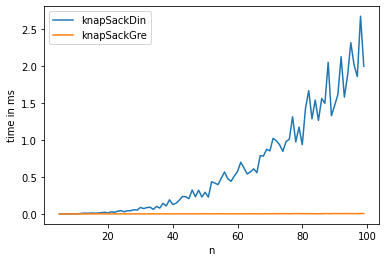

In [21]:
x=[]; y=[]
z=[]; w=[]

for n in range(5,100):

  W, val, wt = knapsack_instance_generator(n)

  #la función repeat está ejecutando 10 veces knapSack y greedyKnapSack con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import knapSackDin", stmt=f"knapSackDin({W}, {wt}, {val}, {len(val)})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import knapSackGre", stmt=f"knapSackGre({W}, {wt}, {val}, {len(val)})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  z.append(n)
  w.append(t2)


plt.plot(x,y)
plt.plot(z,w)
plt.legend(["Dinámico", "Greedy"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

En el gráfico anterior podemos observar que nuestros resultados concuerdan con las complejidades previamente descritas, siendo la del dinámico $O(n * w)$, y la del greedy $O(n^2)$. Aunque debido a los tiempos de ejecución de la implementación dinámica, los del greedy parecen ser una línea recta en el gráfico. Estos tiempos de ejecución del dinámico pueden ser debido al gran tamaño de las matrices al aumentar el tamaño de los problemas.

## 5.2 Dinámico vs Greedy (cantidad de iteraciones/sub-problemas)

A continuación se muestra un gráfico en el que se comparan la cantidad de iteraciones/subproblemas resueltos entre las implementaciones dinámica y greedy del algoritmo para tamaños de problemas con n ∈ [5, 100].



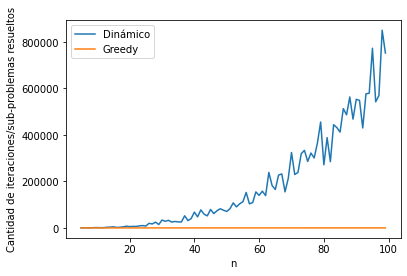

In [24]:
x=[n for n in range(5,100)] 
y=[]; 
z=[];

for n in range(5,100):
  W, val, wt = knapsack_instance_generator(n)

  subproblemas = 0
  knapSackDin(W, wt, val, len(val))

  iteraciones = 0
  knapSackGre(W, wt, val, len(val))

  y.append(subproblemas)
  z.append(iteraciones)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Dinámico", "Greedy"])

plt.xlabel('n')
plt.ylabel('Cantidad de iteraciones/sub-problemas resueltos')
plt.show()

### Análisis de resultados

Podemos observar en el gráfico como la cantidad de subproblemas resueltos en el dinámico crece mucho más rápido que la cantidad de iteraciones en el greedy debido a las matrices enormes que debe ir resolviendo el dinámico a medida de que aumenta su tamaño. A cambio del algoritmo greedy donde el algoritmo solo debe iterar un máximo de $n$ veces cada vez que se llama.

## 5.3 Dinámico vs Greedy (solución óptima alcanzada)

A continuación se muestra un gráfico en el que se comparan las soluciones obtenidas entre las implementaciones dinámica y greedy del algoritmo para tamaños de problemas con n ∈ [1, 15].

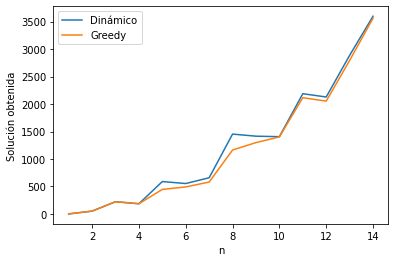

In [70]:
x=[n for n in range(1,15)] 
y=[]; 
z=[];

for n in range(1,15):
  W, val, wt = knapsack_instance_generator(n)

  subProblemas = 0
  a = knapSackDin(W, wt, val, len(val))

  iteraciones = 0
  b = knapSackGre(W, wt, val, len(val))

  y.append(a)
  z.append(b)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Dinámico", "Greedy"])

plt.xlabel('n')
plt.ylabel('Solución obtenida')
plt.show()

### Análisis de resultados

En el gráfico, podemos comprobar la correctitud previamente descrita, ya que el algoritmo dinámico siempre llega a la solución óptima, mientras que el algoritmo greedy se conforma con igualar al dinámico o entregar una solución peor, pero nunca una mejor.